## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [ ]:
Fraud_Data = pd.read_csv("Fraud.csv")
Fraud_Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Meaning of various features used in training and analysing data:-

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Analysing Given Data:

In [ ]:
Fraud_Data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
Fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
print("Transcation Considered as fraud:- ")
Fraud_Data['isFraud'].value_counts()

Transcation Considered as fraud:- 


0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
print("Transcation Actually fraud:- ")
Fraud_Data['isFlaggedFraud'].value_counts()

Transcation Actually fraud:- 


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
Fraud_Data['step'].value_counts().head()

19     51352
18     49579
187    49083
235    47491
307    46968
Name: step, dtype: int64

### Visualising the Dataset:

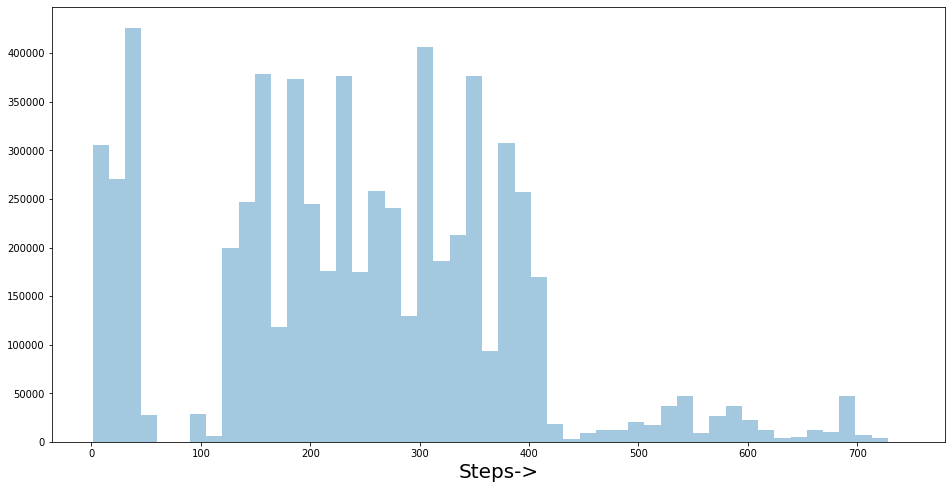

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.distplot(Fraud_Data['step'],kde=False)
plt.xlabel("Steps->",fontsize=20)
plt.show();

The above plotted graph show the number of trasaction during different step number
<br>1 step = an hour of a day
<br>1 day = 24 hours
<br>1 month = 31 days
<br>Total Number of Steps = 1\*24\*31 = 744 Steps

#### Conculsion:
<br>Most Fraudulent Transactions are done in range [0-400] steps i.e.
<br>step = 000 => start of the month
<br>step = 400 => 16th day of the month
<br>We can conlude that most of the fraud transactions are done in the first half of the month

In [ ]:
Fraud_Data.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64

<BarContainer object of 5 artists>

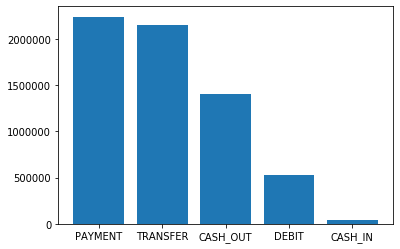

In [ ]:
plt.bar(Fraud_Data['type'].unique(),Fraud_Data['type'].value_counts())

In [ ]:
The above plotted graph represents the various modes of transactions done in the given duration

In [ ]:
cash_out_transaction = Fraud_Data[Fraud_Data['type'] == 'CASH_OUT']

In [ ]:
isFraud_cash_out = cash_out_transaction[cash_out_transaction.isFraud == 1]

In [ ]:
isFraud_cash_out.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0


In [ ]:
len(isFraud_cash_out)

4116

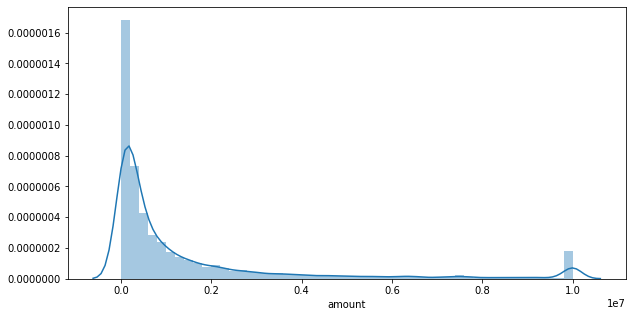

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(isFraud_cash_out['amount'])
plt.show()

In [ ]:
transfer_transaction = Fraud_Data[Fraud_Data['type'] == 'TRANSFER']

In [ ]:
isFraud_transfer = transfer_transaction[transfer_transaction['isFraud']==1]
isFraud_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0


In [ ]:
isFraud_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0


In [ ]:
len(isFraud_transfer)

4097

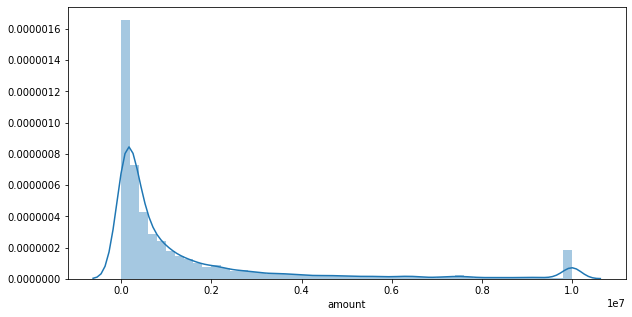

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(isFraud_transfer['amount'])
plt.show()

In [ ]:
X = Fraud_Data.loc[(Fraud_Data.type == 'TRANSFER') | (Fraud_Data.type == 'CASH_OUT')]
X.shape

(2770409, 11)

In [ ]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


### Data preperation for Prediction

In [ ]:
X['Conflicting_Amount_Original'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['Conflicting_Amount_Destination'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X.shape

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(2770409, 13)

In [ ]:
X = X.drop(['nameOrig','nameDest'],axis=1)

In [ ]:
X['type'].replace(to_replace=['TRANSFER','CASH_OUT'],value=[0,1],inplace=True)

In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Conflicting_Amount_Original,Conflicting_Amount_Destination
2,1,0,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.0


In [ ]:
X.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [ ]:
y = X.isFraud
X = X.drop('isFraud',axis=1)

In [ ]:
columns = X.columns
columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud',
       'Conflicting_Amount_Original', 'Conflicting_Amount_Destination'],
      dtype='object')

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
smote = SMOTE()
X_new, y_new = smote.fit_resample(X,y)

In [ ]:
y_new.value_counts()

1    2762196
0    2762196
Name: isFraud, dtype: int64

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X_new)
y = sc.fit_transform(np.array(y_new).reshape(-1,1))

In [ ]:
X = pd.DataFrame(X,columns=columns)
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,Conflicting_Amount_Original,Conflicting_Amount_Destination
0,-1.758335,-1.372521,-0.468764,-0.322315,-0.075222,-0.313711,-0.407009,-0.027032,-0.225277,-0.245384
1,-1.758335,0.728586,-0.468764,-0.322315,-0.075222,-0.307767,-0.407009,-0.027032,-0.225277,-0.230622
2,-1.758335,0.728586,-0.348281,-0.316542,-0.075222,-0.312285,-0.394353,-0.027032,0.099869,-0.118185
3,-1.758335,-1.372521,-0.355556,-0.322115,-0.075222,-0.307418,-0.407009,-0.027032,0.101080,-0.079833
4,-1.758335,-1.372521,-0.304839,-0.318254,-0.075222,-0.311953,0.261080,-0.027032,0.232236,-1.918908


In [ ]:
y = pd.DataFrame(y,columns=['isFraud'])
y.head()

,isFraud
0,1.0
1,1.0
2,-1.0
3,-1.0
4,-1.0


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Training

### Logistic Regression

In [ ]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(Xtrain,ytrain)
y_pred = lr.predict(Xtest)
print('Accuracy Score: ',accuracy_score(ytest,y_pred))
print('Confusion Matrix: \n',confusion_matrix(ytest,y_pred))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.9477825173616297
Confusion Matrix: 
 [[523400  28506]
 [ 29188 523785]]


### XG Boost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=30, max_depth=25)
xg.fit(Xtrain,ytrain)
y_pred2 = xg.predict(Xtest) 
print('Accuracy Score: ',accuracy_score(ytest,y_pred2))
print('Confusion Matrix: \n',confusion_matrix(ytest,y_pred2))

Accuracy Score:  0.9998189847033023
Confusion Matrix: 
 [[551794    112]
 [    88 552885]]


### Naive Bias

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
y_pred3 = gnb.predict(Xtest)
print('Accuracy Score: ',accuracy_score(ytest,y_pred3))
print('Confusion Matrix: \n',confusion_matrix(ytest,y_pred3))

Accuracy Score:  0.6866570909574714
Confusion Matrix: 
 [[547503   4403]
 [341803 211170]]


### K Nearest Neighbouring

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kNearest = KNeighborsClassifier(n_neighbors=2)
kNearest.fit(Xtrain,ytrain)
y_pred4 = kNearest.predict(Xtest)
print('Accuracy Score: ',accuracy_score(ytest,y_pred4))
print('Confusion Matrix: \n',confusion_matrix(ytest,y_pred4))

Accuracy Score:  0.9929521694230771
Confusion Matrix: 
 [[547295   4611]
 [  3176 549797]]


### Descision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  "
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42)  
classifier.fit(Xtrain, ytrain)  "
y_pred5 = classifier.predict(Xtest)
print('Accuracy Score: ',accuracy_score(ytest,y_pred5))
print('Confusion Matrix: \n',confusion_matrix(ytest,y_pred5))

Accuracy Score:  0.9997429582786893
Confusion Matrix: 
 [[551737    169]
 [   115 552858]]
